[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vmetsis/cads-cv/blob/main/1.2-elementary_image_operations-part2.ipynb)


# Elementary Image Operations - Part 2

In this module, we will learn to perform arithmetic, logical, and geometric operations on images.

In [1]:
import numpy as np          # numpy is a package for scientific computing in Python
import cv2 as cv            # cv2 is a package for computer vision in Python
import matplotlib.pyplot as plt # matplotlib is a package for plotting data in Python

# this line is necessary to show the image in the notebook
%matplotlib inline

## Download data

In [2]:
# If running on Google Colab, download the data first.

import os
import sys

def download_files(base_url, files, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)
    for file in files:
        file_url = base_url + file
        os.system(f"wget -q {file_url} -P {local_dir}")

def download_data():
    base_url = "https://raw.githubusercontent.com/vmetsis/cads-cv/main/data/"
    faces_files = ["faces/04305d01.bmp", "faces/04309d01.bmp"]
    
    download_files(base_url, faces_files, 'data/faces')

if 'google.colab' in sys.modules:
    download_data()

## Arithmetic operations on images

### Addition
Let's create two matrices (2-dimensional numpy arrays) with a single pixel in each. Pixel values are 8-bit unsigned integers with value range from 0 to 255.

In [3]:
x = np.uint8([250])                            # Create a numpy array of a single integer
y = np.uint8([10])

print(x + y)

[4]


In [4]:
print(cv.add(x, y))

[[255]]


We notice that adding `x + y` produces a sum of 4. That's because a sum greater than 255 results in an overflow for a uint8. Adding those numbers using the cv `add` function on the other hand results in a sum of 255. That's because the cv function knows that the maximum possible value for an image pixel is 255, and automatically sets the sum to that value when it is greater than 255.

The same can be done with whole images. Let's load two grayscale face pictures and add them together.

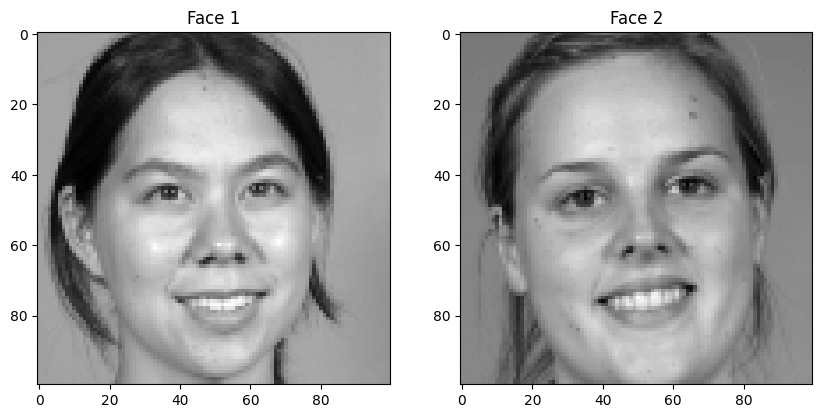

In [5]:
# Read a gray scale image
face1 = cv.imread('data/faces/04305d01.bmp', cv.IMREAD_GRAYSCALE)   # Read the image in grayscale
face2 = cv.imread('data/faces/04309d01.bmp', 0)                     # Alternatively, we can pass the flag 0 to read 
                                                                    # an image in grayscale

# Create a subplot of one row and two columns
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1),plt.imshow(face1, cmap='gray'),plt.title('Face 1') # Show the image in grayscale
plt.subplot(1, 2, 2),plt.imshow(face2, cmap='gray'),plt.title('Face 2')
plt.show()

Let's add the two faces together.

(<matplotlib.image.AxesImage at 0x2855f5b1090>, Text(0.5, 1.0, 'Blended Face'))

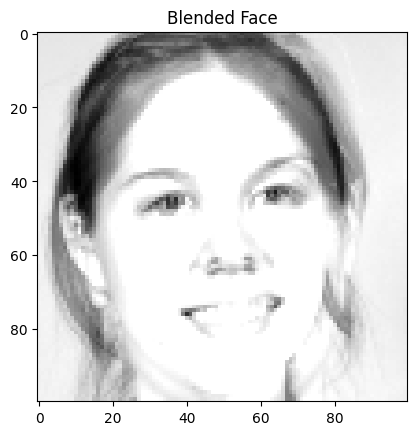

In [6]:
# Add the two images
blended_face = cv.add(face1, face2)

# Show the blended face
plt.imshow(blended_face, cmap='gray'),plt.title('Blended Face')

Notice how the final result is a mix of the two faces, and it looks brighter than the original faces because the sum of the pixel values get closer to 255 which is the grayscale value for white.

We can also control how strongly each face will control the result by doing a weighted addition using the function `cv.addWeighted()`. 

The weighted addition uses the following formula:
$$ dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma $$
where $\alpha$ and $\beta$ are the weights of the first and second elements respectively, and $\gamma$ is an extra scalar we may want to add to the sum.

(<matplotlib.image.AxesImage at 0x2855f5eed90>,
 Text(0.5, 1.0, 'Weighted Blend'))

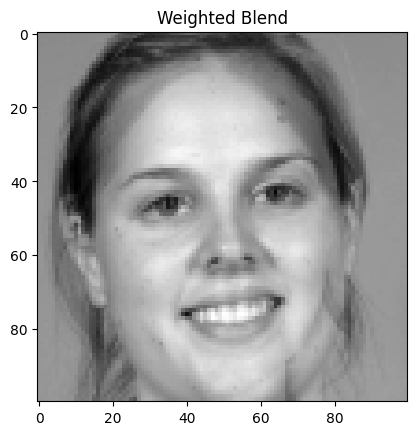

In [7]:
# Perform a weighted sum of the two images
weighted_blend = cv.addWeighted(face1, 0.3, face2, 0.8, 0)

# Show the weighted blend
plt.imshow(weighted_blend, cmap='gray'),plt.title('Weighted Blend')

## Logical operations on images

### Bitwise boolean operations

Bitwise boolean operations, like AND (`&`), OR (`|`), XOR (`^`), and NOT (`~`) are used to perform boolean operations on images.

Such operations are easier to see on binary images. A binary image is a 2D array of 0s and 1s.

(<matplotlib.image.AxesImage at 0x2855f65f410>, Text(0.5, 1.0, 'Circle'))

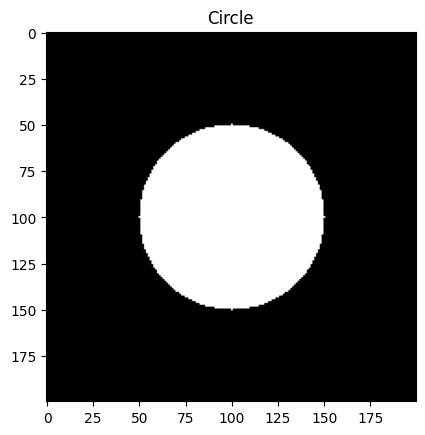

In [8]:
# Generate a two dimensional binary numpy array that contains a circle
# The circle is centered at (100, 100) and has radius 50
# The circle is filled with ones
circle = np.zeros((200, 200), np.uint8)
cv.circle(circle, (100, 100), 50, 255, -1)

# Display the circle
plt.imshow(circle, cmap='gray'),plt.title('Circle')

(<matplotlib.image.AxesImage at 0x2856292c6d0>, Text(0.5, 1.0, 'Square'))

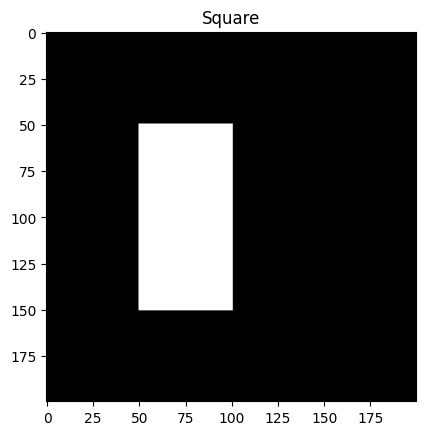

In [9]:
# Generate a two dimensional binary numpy array that contains a rectangle
# The top left corner of the rectangle is at (50, 50) and has width 50 and height of 100
# The square is filled with ones
rectangle = np.zeros((200, 200), np.uint8)
cv.rectangle(rectangle, (50, 50), (100, 150), 255, -1)

# Display the square
plt.imshow(rectangle, cmap='gray'),plt.title('Square')

Let's now apply some bitwise boolean operations to the circle and the rectangle.

(<matplotlib.image.AxesImage at 0x2856299f410>, Text(0.5, 1.0, 'Bitwise AND'))

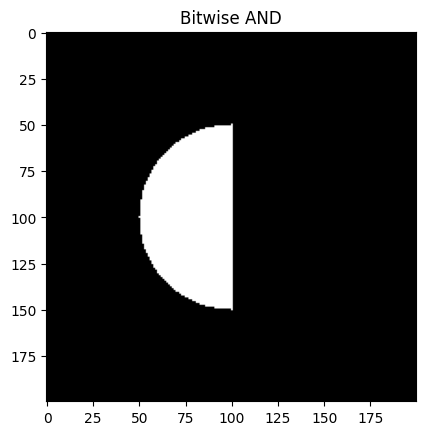

In [10]:
# Bitwise AND the circle and the square
bitwise_and = cv.bitwise_and(circle, rectangle)

# Display the bitwise AND
plt.imshow(bitwise_and, cmap='gray'),plt.title('Bitwise AND')

(<matplotlib.image.AxesImage at 0x285629fed90>, Text(0.5, 1.0, 'Bitwise OR'))

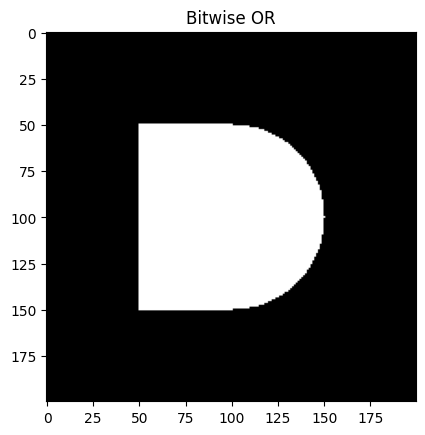

In [11]:
# Bitwise OR the circle and the square
bitwise_or = cv.bitwise_or(circle, rectangle)

# Display the bitwise OR
plt.imshow(bitwise_or, cmap='gray'),plt.title('Bitwise OR')

(<matplotlib.image.AxesImage at 0x28562aa2050>, Text(0.5, 1.0, 'Bitwise NOT'))

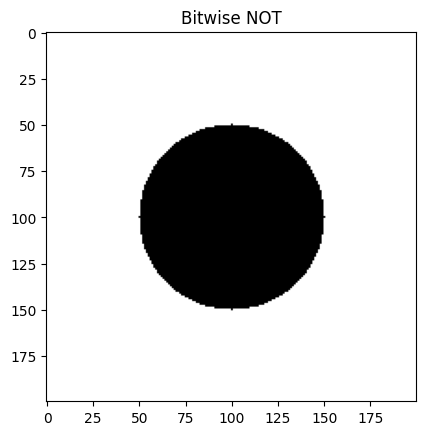

In [12]:
# Bitwise NOT the circle
bitwise_not = cv.bitwise_not(circle)

# Display the bitwise NOT
plt.imshow(bitwise_not, cmap='gray'),plt.title('Bitwise NOT')

## Geometric transformations of images

Another type of transformation that we can apply to images is geometric transformations. As the name implies, such transformations change the shape of the image. Examples of such transformations are translation, rotation, affine transformation etc. 

### Scaling
Let's apply some of those transformations to one of the faces that we previously loaded.

(<matplotlib.image.AxesImage at 0x28562b171d0>, Text(0.5, 1.0, 'Face 1 Small'))

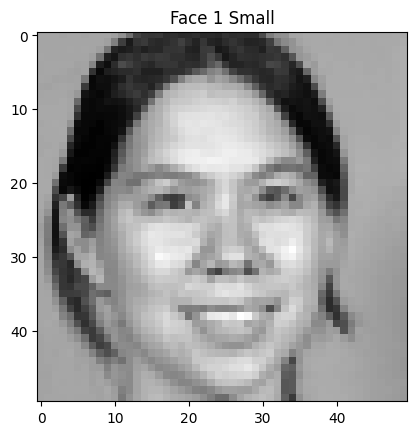

In [13]:
# Resize face1 to half the original size
# Please refer to the documentation for cv.resize() - https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d
face1_small = cv.resize(face1, None, fx=0.5, fy=0.5)
plt.imshow(face1_small, cmap='gray'),plt.title('Face 1 Small')

As you can see, the axes now have the range 0-50 as opposed to 0-100 that they did before, indicating that the image image is half the size. We can also verify that by printing out the dimensions of the original face1 and the resized one.

In [14]:
print(face1.shape)
print(face1_small.shape)

(100, 100)
(50, 50)


Other geometric operations, like translation, rotation, and affine transformations can be done with the help of the function `cv.warpAffine`.

### Translation

Translation is the shifting of an object's location. If you know the shift in the (x,y) direction and let it be $(t_x,t_y)$, you can create the transformation matrix M as follows:

$$ M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} $$

Let's translate the face image by a few pixels.

(<matplotlib.image.AxesImage at 0x28562b5d310>,
 Text(0.5, 1.0, 'Face 1 Translated'))

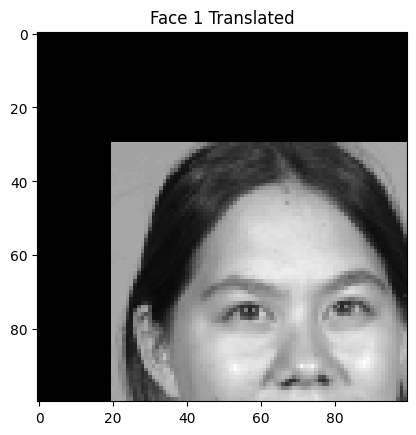

In [15]:
# Translate face1 by 20 pixels to the right and 30 pixels down
M = np.float32([[1, 0, 20], [0, 1, 30]])                    # Define the translation matrix
rows, cols = face1.shape                                    # Get the number of rows and columns in the image
face1_translated = cv.warpAffine(face1, M, (cols, rows))    # Perform the translation
plt.imshow(face1_translated, cmap='gray'),plt.title('Face 1 Translated')

### Rotation

Rotation of an image for an angle $θ$ is achieved by the transformation matrix of the form.

$$ M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix} $$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by

$$ \begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix} $$ 
where:
$$ \begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array} $$

To find this transformation matrix, OpenCV provides a function, `cv.getRotationMatrix2D`. Check out the below example which rotates the image by 90 degree with respect to center without any scaling.

(<matplotlib.image.AxesImage at 0x28562be9710>,
 Text(0.5, 1.0, 'Face 1 Rotated'))

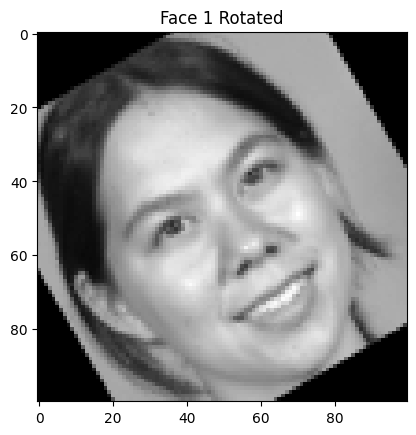

In [16]:
# Rotate face1 by 30 degrees
M = cv.getRotationMatrix2D((cols/2, rows/2), 30, 1)             # (center, angle, scale)
face1_rotated = cv.warpAffine(face1, M, (cols, rows))           # Perform the rotation
plt.imshow(face1_rotated, cmap='gray'),plt.title('Face 1 Rotated')

### Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then `cv.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv.warpAffine`.

Check the below example, and also look at the points I selected (which are marked in green color): 

In [17]:
# Auxiliary function to draw a few points on a given image
def draw_points(img, points):
    for x, y in points:
        cv.circle(img, (int(x), int(y)), 2, (255, 255, 255), -1)

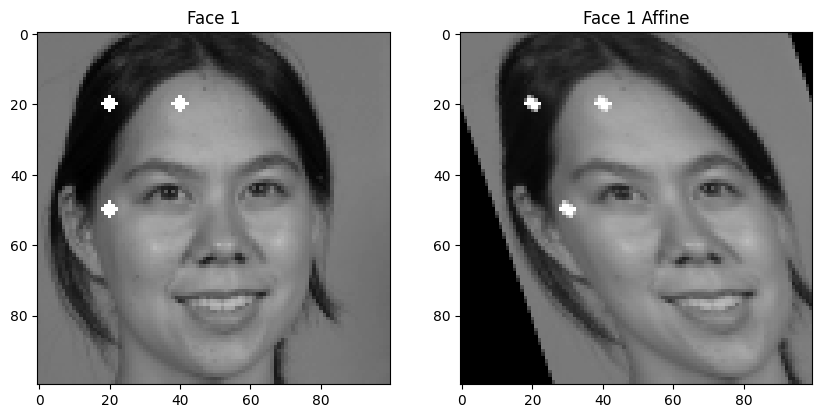

In [18]:
# Read a gray scale image
face1 = cv.imread('data/faces/04305d01.bmp', 0)

# Perform an affine transform on face1
pts1 = np.float32([[20, 20], [40, 20], [20, 50]])       # (x, y) positions of three points in the image
pts2 = np.float32([[20, 20], [40, 20], [30, 50]])       # the new positions of the three points
draw_points(face1, pts1) # Draw the points on face1

M = cv.getAffineTransform(pts1, pts2)                   # Compute the affine transform
face1_affine = cv.warpAffine(face1, M, (cols, rows))    # Perform the affine transform

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1),plt.imshow(face1, cmap='gray'),plt.title('Face 1')
plt.subplot(1, 2, 2),plt.imshow(face1_affine, cmap='gray'),plt.title('Face 1 Affine')
plt.show()

We notice that the point at the original position (x, y) = (20, 50) was moved the the new position (30, 50), and with it the entire image was transformed accordingly.